# LAB2: Numerical Differentiation

## First order Derivatives 

In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np

N = 50
A = -5
B = 5
STEP = (A - B) / (N - 1)


def func(x):
    return np.cosh(np.exp(-x**2))


def func_d1(x):
    return -2 * x * np.exp(-x**2) * np.sinh(np.exp(-x**2))


x = np.linspace(A, B, N)


In [19]:
def get_right_dif(points):
    dif = []
    for i in range(0, len(points) - 1):
        dif.append((func(points[i]) - func(points[i + 1])) / STEP)
    return dif


def get_central_dif(points):
    dif = []
    for i in range(1, len(points) - 1):
        dif.append((func(points[i - 1]) - func(points[i + 1])) / (2 * STEP))
    return dif

In [20]:
# Mean squared error (MSE)
# Mean absolute error (MAE)
def avg_MSE(y1, y2):
    mse = 0
    mae = 0
    mx = 0
    for i in range(len(y1)):
        y = abs(y1[i] - y2[i])
        mse += y ** 2
        mae += y
        mx = max(mx, y)
    mse = mse / len(y1)
    mae = mae / len(y1)
    print(f'MSE: {round(mse, 6)}, MAE: {round(mae, 6)}, MAX: {round(mx, 6)}')

In [21]:
y = func(x)
y_dif = func_d1(x)
right_dif = get_right_dif(x)
central_dif = get_central_dif(x)

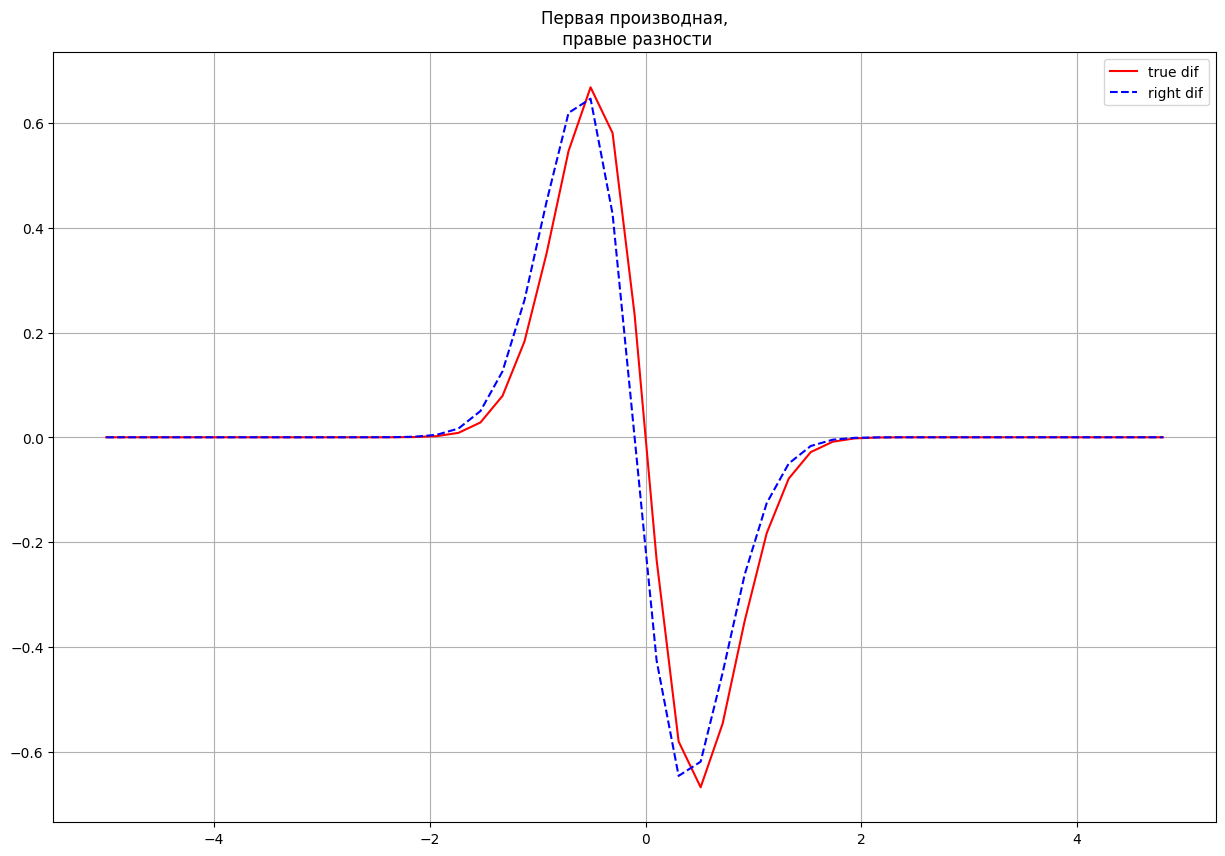

In [22]:
plt.figure(figsize=(15, 10))
plt.title("Первая производная,\n правые разности")
plt.grid(True)
plt.plot(x[:-1], y_dif[:-1], color='red', label="true dif")
plt.plot(x[:-1], right_dif, color="blue", linestyle="--", label="right dif")
plt.legend()
plt.show()

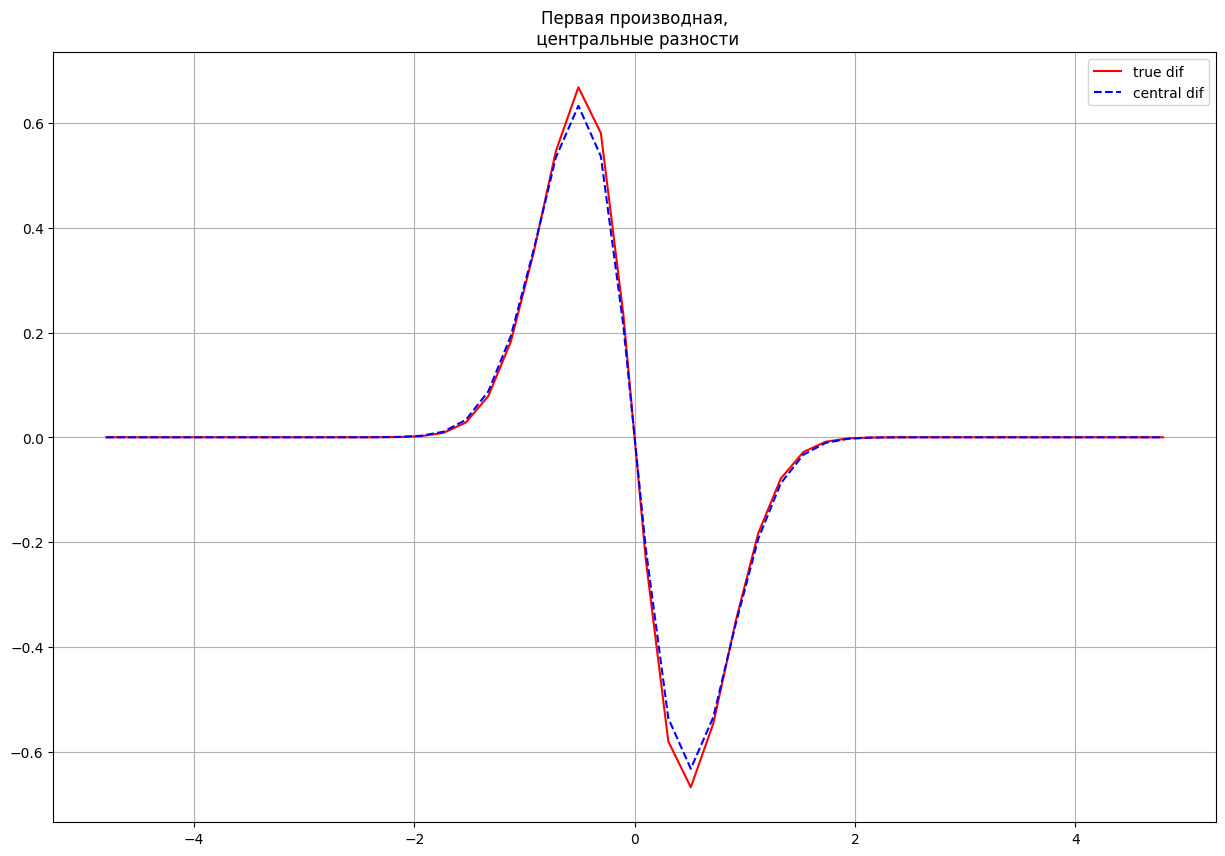

In [23]:
plt.figure(figsize=(15, 10))
plt.title("Первая производная,\n центральные разности")
plt.grid(True)
plt.plot(x[1:-1], y_dif[1:-1], color='red', label="true dif")
plt.plot(x[1:-1], central_dif, color="blue", linestyle="--", label="central dif")
plt.legend()
plt.show()

In [24]:
avg_MSE(y_dif[:-1], right_dif)
avg_MSE(y_dif[1:-1], central_dif)

MSE: 0.003435, MAE: 0.02727, MAX: 0.234137
MSE: 0.000169, MAE: 0.006085, MAX: 0.044389


## Second Derivatives 

In [25]:
def func_d2(x):
    return np.exp(-2 * x**2) * ( (4* x**2 - 2) * np.exp(x**2) * np.sinh(np.exp(-x**2)) + 4 * x**2 * np.cosh(np.exp(-x**2)) )

In [26]:
def get_dif2_2accuracy(points):
    dif = []
    for i in range(1, len(points) - 1):
        dif.append((func(points[i - 1]) - 2 * func(points[i]) + func(points[i + 1])) / (STEP ** 2))
        # dif.append((func(points[i + 1])- func(points[i]) - func(points[i -1])) / (STEP ** 2))
    return dif


def get_dif2_4accuracy(points):
    dif = []
    for i in range(2, len(points) - 2):
        dif.append((-func(points[i - 2]) + 16 * func(points[i - 1]) - 30 * func(points[i]) + 16 * func(points[i + 1]) - func(points[i + 2])) / (12 * (STEP ** 2)))
    return dif

In [27]:
y_dif2 = func_d2(x)

dif2_2 = get_dif2_2accuracy(x)
dif2_4 = get_dif2_4accuracy(x)

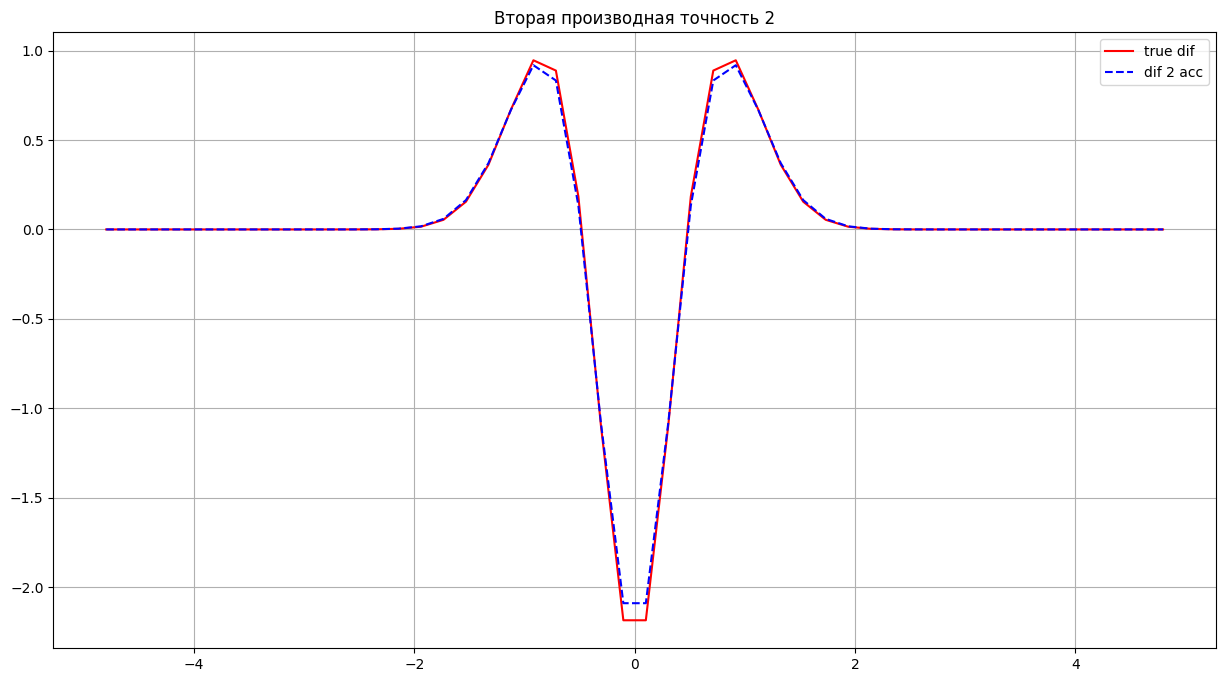

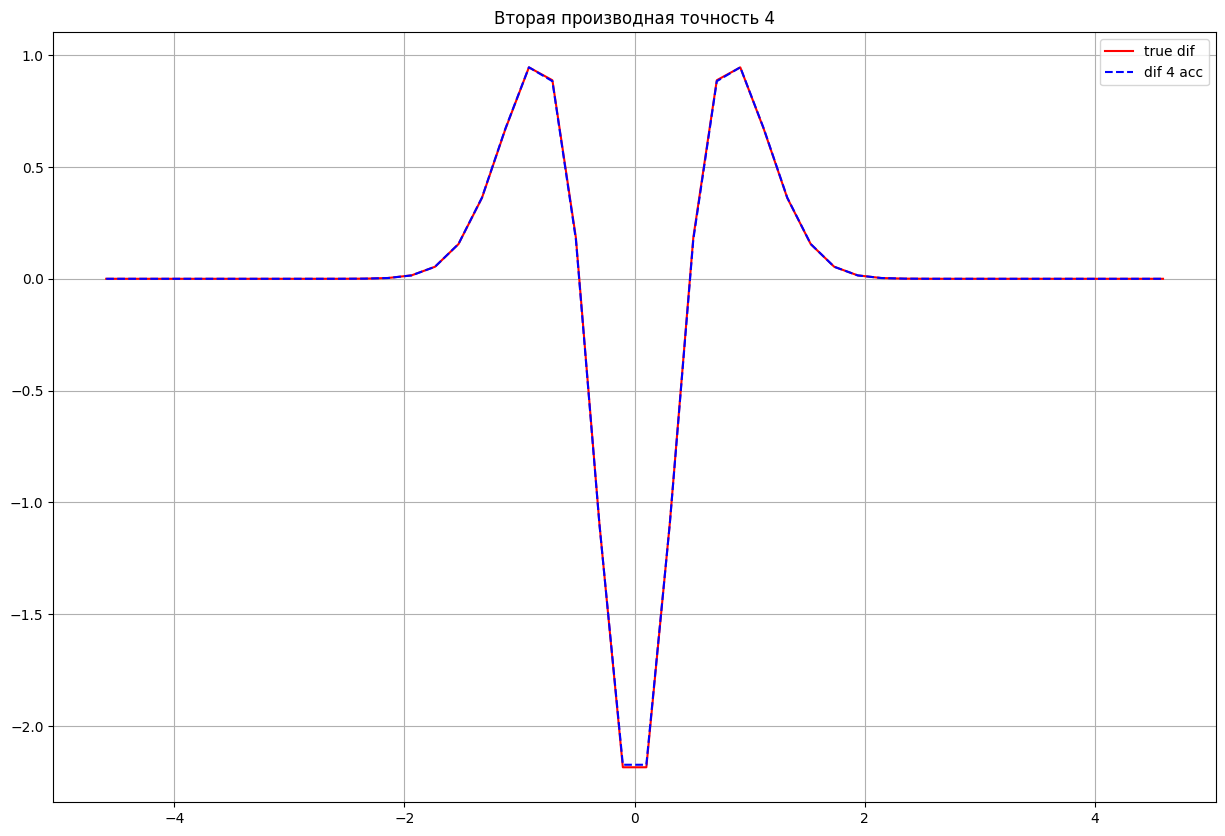

In [28]:
plt.figure(figsize=(15,8))
plt.title("Вторая производная точность 2")
plt.grid(True)
plt.plot(x[1:-1], y_dif2[1:-1], color='red', label="true dif")
plt.plot(x[1:-1], dif2_2, color="blue", linestyle="--", label="dif 2 acc")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Вторая производная точность 4")
plt.grid(True)
plt.plot(x[2:-2], y_dif2[2:-2], color='red', label="true dif")
plt.plot(x[2:-2], dif2_4, color="blue", linestyle="--", label="dif 4 acc")
plt.legend()
plt.show()

In [29]:
avg_MSE(y_dif2[1:-1], dif2_2)
avg_MSE(y_dif2[2:-2], dif2_4)

MSE: 0.000665, MAE: 0.011338, MAX: 0.095482
MSE: 1e-05, MAE: 0.001361, MAX: 0.011276


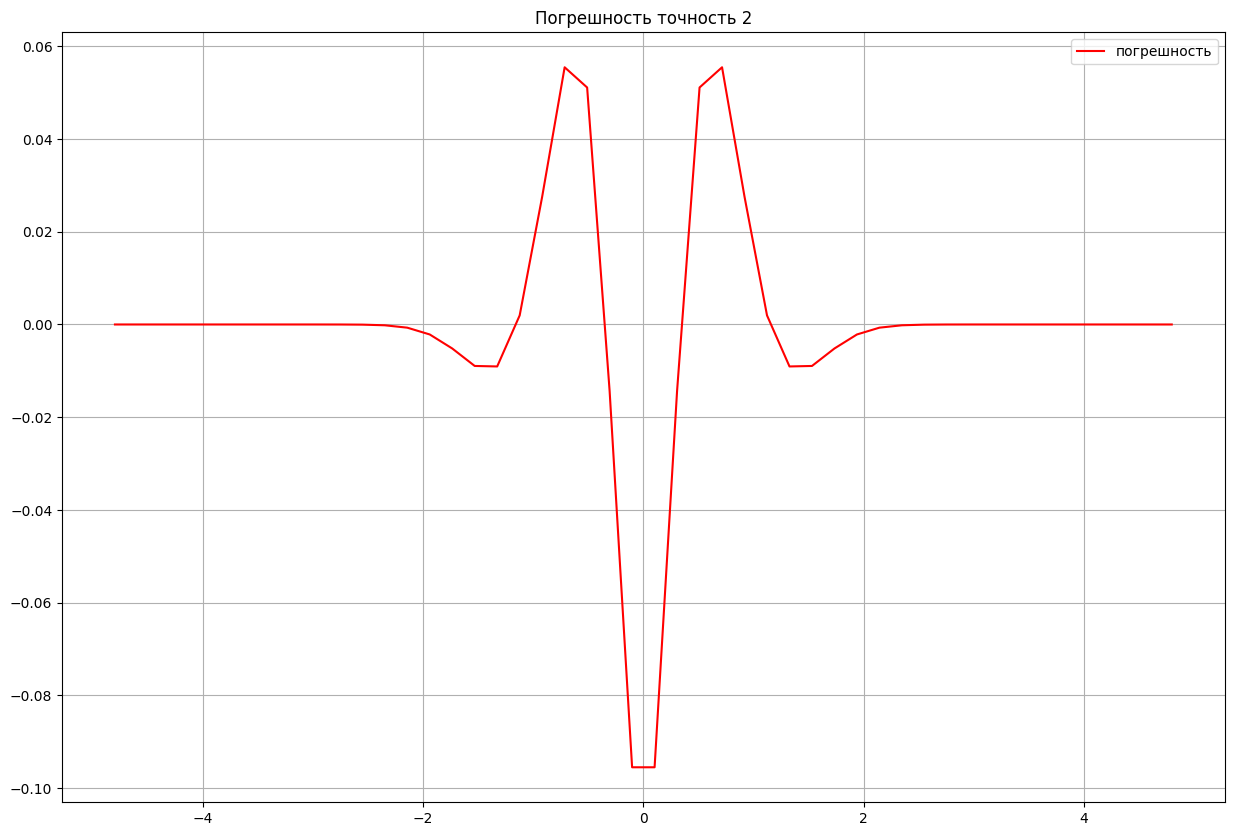

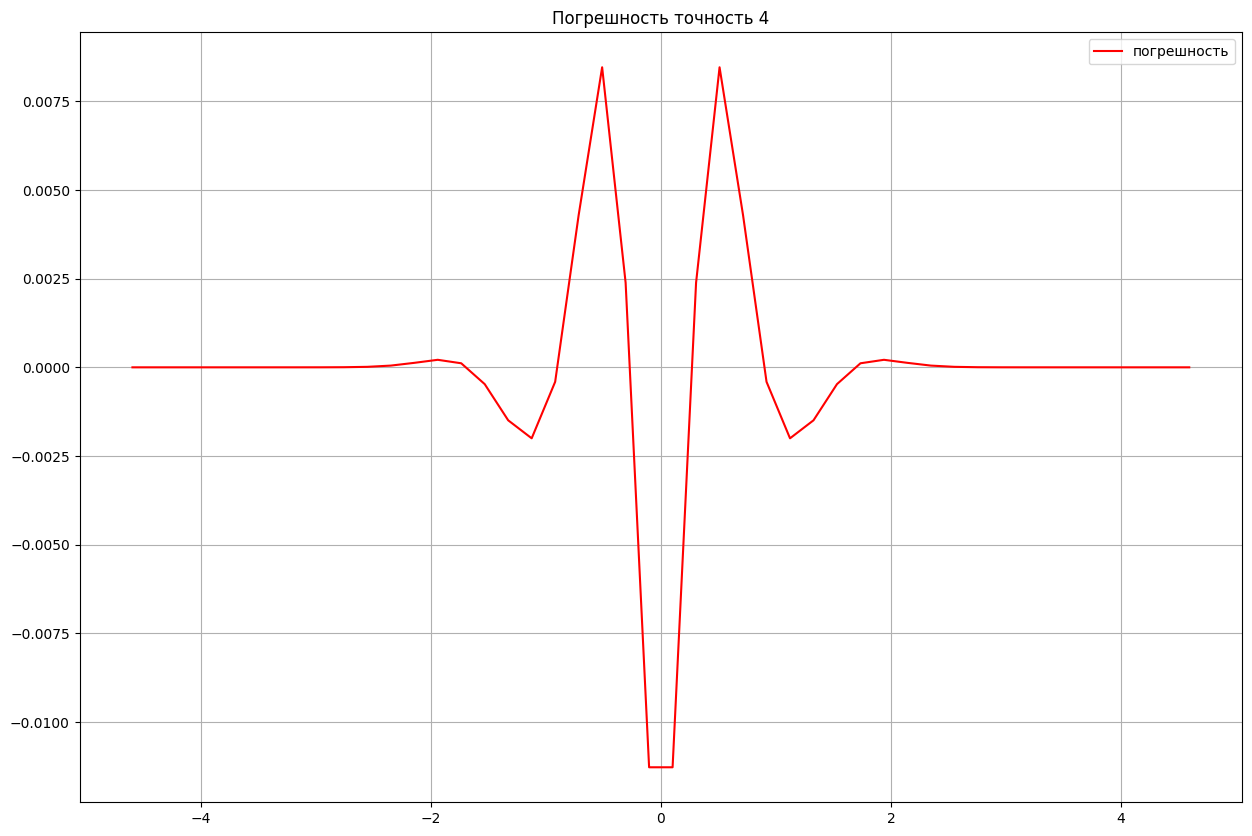

In [30]:
plt.figure(figsize=(15, 10))
plt.title("Погрешность точность 2")
plt.grid(True)
plt.plot(x[1:-1], y_dif2[1:-1] - dif2_2, color='red', label="погрешность")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Погрешность точность 4")
plt.grid(True)
plt.plot(x[2:-2], y_dif2[2:-2] - dif2_4, color='red', label="погрешность")
plt.legend()
plt.show()